In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif
from mlxtend .plotting import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\archive\diabetes_binary_health_indicators_BRFSS2021.csv")

In [3]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [4]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [6]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [7]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       236378 non-null  int32
 1   HighBP                236378 non-null  int32
 2   HighChol              236378 non-null  int32
 3   CholCheck             236378 non-null  int32
 4   BMI                   236378 non-null  int32
 5   Smoker                236378 non-null  int32
 6   Stroke                236378 non-null  int32
 7   HeartDiseaseorAttack  236378 non-null  int32
 8   PhysActivity          236378 non-null  int32
 9   Fruits                236378 non-null  int32
 10  Veggies               236378 non-null  int32
 11  HvyAlcoholConsump     236378 non-null  int32
 12  AnyHealthcare         236378 non-null  int32
 13  NoDocbcCost           236378 non-null  int32
 14  GenHlth               236378 non-null  int32
 15  MentHlth              236378 non-n

In [9]:
data.shape

(236378, 22)

In [10]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
#checking for any duplicated data from all the dataset
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(223243, 22)

In [13]:
#outlier detection
from sklearn.ensemble import IsolationForest
model=IsolationForest()
model.fit(data)
data['anomaly']=model.predict(data)

In [14]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,0,1,1,15,1,0,0,0,1,...,0,5,10,20,0,0,11,4,5,-1
1,1,1,0,1,28,0,0,1,0,1,...,0,2,0,0,0,0,11,4,3,-1
2,1,1,1,1,33,0,0,0,1,1,...,0,2,10,0,0,0,9,4,7,1
3,1,0,1,1,29,0,1,1,1,1,...,0,5,0,30,1,1,12,3,4,-1
4,0,0,0,1,24,1,0,0,0,0,...,0,3,0,0,1,1,13,5,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1,1,1,1,21,0,0,0,1,1,...,0,4,0,0,0,1,10,2,3,-1
236374,0,1,0,1,25,1,0,0,1,1,...,1,2,20,0,0,0,3,4,5,-1
236375,0,0,1,1,31,0,0,0,1,1,...,0,2,0,0,0,1,7,6,10,1
236376,0,1,0,1,24,0,0,0,1,1,...,0,2,0,0,0,1,10,4,6,1


In [15]:
#checking the outliers that have been detected
data[data['anomaly']==-1]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,0,1,1,15,1,0,0,0,1,...,0,5,10,20,0,0,11,4,5,-1
1,1,1,0,1,28,0,0,1,0,1,...,0,2,0,0,0,0,11,4,3,-1
3,1,0,1,1,29,0,1,1,1,1,...,0,5,0,30,1,1,12,3,4,-1
4,0,0,0,1,24,1,0,0,0,0,...,0,3,0,0,1,1,13,5,6,-1
5,0,1,0,1,40,1,0,0,1,1,...,0,3,5,25,1,0,10,4,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236364,0,0,0,1,37,0,0,0,0,0,...,1,1,0,0,0,1,4,4,7,-1
236369,1,1,1,1,33,0,0,0,0,0,...,0,2,0,0,1,1,10,4,5,-1
236371,0,1,1,0,21,0,0,0,1,0,...,0,3,0,0,0,1,8,4,5,-1
236373,1,1,1,1,21,0,0,0,1,1,...,0,4,0,0,0,1,10,2,3,-1


In [16]:
data[data['anomaly']==-1].shape

(68533, 23)

In [17]:
# we have to remove the outliers(anomalies)detected
data.drop(data[data['anomaly']==-1].index,inplace=True)

In [18]:
data.shape

(154710, 23)

In [19]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
2,1,1,1,1,33,0,0,0,1,1,...,0,2,10,0,0,0,9,4,7,1
8,0,1,1,1,30,0,0,0,0,1,...,0,2,0,0,0,0,7,4,6,1
9,0,1,1,1,36,1,0,0,0,0,...,0,4,0,0,0,1,10,4,8,1
11,1,1,1,1,30,0,0,0,0,1,...,0,3,2,4,0,0,11,5,4,1
14,0,1,1,1,27,1,0,0,0,1,...,0,3,0,2,1,0,13,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236370,0,0,0,1,19,0,0,0,1,1,...,0,2,0,0,0,1,10,4,1,1
236372,0,0,0,1,29,0,0,0,1,1,...,0,2,0,5,0,1,2,6,11,1
236375,0,0,1,1,31,0,0,0,1,1,...,0,2,0,0,0,1,7,6,10,1
236376,0,1,0,1,24,0,0,0,1,1,...,0,2,0,0,0,1,10,4,6,1


In [20]:
# now we have to remove the column 'anomaly ' that has been created for the outliers detection
data.drop(columns=['anomaly'],inplace=True)


In [21]:
data.shape

(154710, 22)

Scaling the data

In [22]:
x=data.drop(['Diabetes_binary'],axis=1)
y=data['Diabetes_binary']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [24]:
scaled_features=scaler.transform(x)
x=pd.DataFrame(scaled_features,columns=data.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.321513,1.318273,0.122084,0.810077,-0.760388,-0.089448,-0.171712,0.388130,0.726678,0.373430,...,0.106715,-0.139687,-0.275079,1.346548,-0.343859,-0.230623,-0.946034,0.411914,-1.529821,-0.174249
1,1.321513,1.318273,0.122084,0.287202,-0.760388,-0.089448,-0.171712,-2.576454,0.726678,0.373430,...,0.106715,-0.139687,-0.275079,-0.450773,-0.343859,-0.230623,-0.946034,-0.208157,-1.529821,-0.646840
2,1.321513,1.318273,0.122084,1.332953,1.315118,-0.089448,-0.171712,-2.576454,-1.376126,-2.677875,...,0.106715,-0.139687,2.140693,-0.450773,-0.343859,-0.230623,1.057044,0.721950,-1.529821,0.298343
3,1.321513,1.318273,0.122084,0.287202,-0.760388,-0.089448,-0.171712,-2.576454,0.726678,0.373430,...,0.106715,-0.139687,0.932807,-0.091309,0.590895,-0.230623,-0.946034,1.031986,-0.333465,-1.592023
4,1.321513,1.318273,0.122084,-0.235673,1.315118,-0.089448,-0.171712,-2.576454,0.726678,0.373430,...,0.106715,-0.139687,0.932807,-0.450773,0.123518,4.336083,-0.946034,1.652057,0.862890,-0.646840
5,1.321513,1.318273,0.122084,1.158661,1.315118,-0.089448,-0.171712,0.388130,0.726678,-2.677875,...,0.106715,-0.139687,0.932807,0.447887,0.357206,-0.230623,-0.946034,1.031986,-1.529821,-1.119431
6,1.321513,1.318273,0.122084,0.287202,-0.760388,-0.089448,-0.171712,0.388130,0.726678,-2.677875,...,0.106715,-0.139687,-0.275079,-0.450773,1.993026,-0.230623,-0.946034,0.721950,0.862890,0.298343
7,-0.756708,-0.758568,0.122084,0.461494,-0.760388,-0.089448,-0.171712,0.388130,0.726678,0.373430,...,0.106715,-0.139687,-1.482965,-0.450773,0.123518,-0.230623,1.057044,1.031986,0.862890,0.298343
8,1.321513,1.318273,0.122084,0.810077,-0.760388,-0.089448,-0.171712,-2.576454,0.726678,0.373430,...,0.106715,-0.139687,-0.275079,-0.450773,-0.343859,-0.230623,-0.946034,1.031986,-0.333465,-1.119431
9,-0.756708,-0.758568,0.122084,0.461494,1.315118,-0.089448,-0.171712,0.388130,0.726678,0.373430,...,0.106715,-0.139687,2.140693,0.447887,-0.343859,-0.230623,-0.946034,0.721950,-0.333465,-0.646840


In [25]:
#Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0,shuffle=True)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(x_test)

In [28]:
print(x_test.dtypes)


HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [29]:
!pip install --upgrade scikit-learn


In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
data['Diabetes_binary'].value_counts()

0    143556
1     11154
Name: Diabetes_binary, dtype: int64

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     50277
           1       0.27      0.08      0.13      3872

    accuracy                           0.92     54149
   macro avg       0.60      0.53      0.54     54149
weighted avg       0.89      0.92      0.90     54149



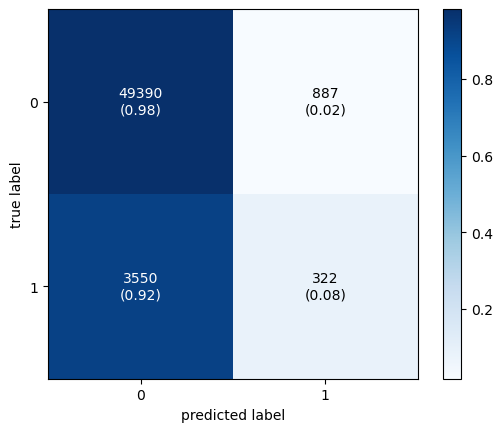

In [33]:
cm1=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

**Addressing Imbalanced Data for Improved Diabetes Prediction**

One of the challenges in predicting diabetes using machine learning models arises from imbalanced data. This means that the number of individuals with diabetes is significantly lower compared to individuals without diabetes. This imbalance can lead to skewed model predictions, favoring the majority class and potentially underestimating the true risk of diabetes for individuals in the minority class.

To address this issue, we will employ a combined technique known as SMOTE + ENN:

* SMOTE (Synthetic Minority Oversampling Technique): This technique artificially increases the number of data points in the minority class by generating synthetic samples based on existing data points. This helps balance the class distribution and provides the model with more information about the minority class, leading to improved predictions.

* ENN (Edited Nearest Neighbors): This technique removes noisy data points from both the majority and minority classes. It identifies data points whose nearest neighbors belong to a different class and removes them from the training set. This helps eliminate misclassified data that could mislead the model, leading to a cleaner and more accurate representation of the underlying class structure.

Combined effect of SMOTE + ENN: By combining SMOTE and ENN, we achieve two key benefits:

* Increased representation of the minority class: SMOTE generates synthetic samples, effectively increasing the number of data points in the minority class and providing the model with more information to learn from.
* Enhanced data quality: ENN removes noisy data points from both classes, leading to a cleaner and more consistent training set. This improves the model's ability to learn the true relationships between features and the target variable, leading to more accurate and reliable predictions.

Overall, the combination of SMOTE and ENN is a powerful technique for addressing imbalanced data and improving the accuracy of diabetes prediction models. By balancing the class distribution and enhancing data quality, these techniques ensure that the model learns from a representative and well-structured dataset, leading to more reliable and accurate predictions for individuals with and without diabetes.

In [34]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_resampled,y_resampled = sm.fit_resample(x,y)

In [35]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [36]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

KNeighborsClassifier()

In [37]:
yre_pred = knn_smote.predict(xre_test)

In [38]:
print(classification_report(yre_test,yre_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     31727
           1       0.93      1.00      0.96     38745

    accuracy                           0.96     70472
   macro avg       0.96      0.95      0.96     70472
weighted avg       0.96      0.96      0.96     70472



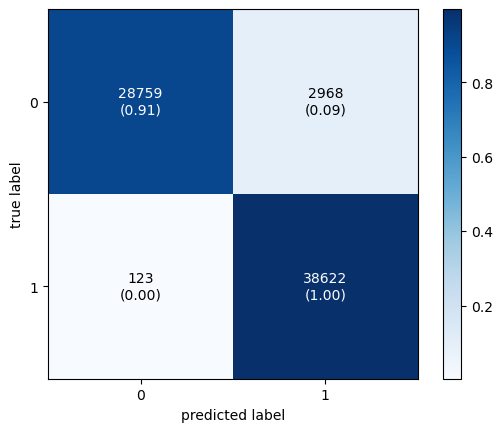

In [39]:
cm1=confusion_matrix(yre_test,yre_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

## Modeling(RF,SVM,&XGB)
## RANDOM FOREST(RF)

In [40]:
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [41]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

0.949985404300866
0.9390396185719151


In [42]:
y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.949985404300866
0.9390396185719151


In [43]:
print(classification_report(yre_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     31727
           1       0.93      0.96      0.95     38745

    accuracy                           0.94     70472
   macro avg       0.94      0.94      0.94     70472
weighted avg       0.94      0.94      0.94     70472



In [44]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

Precision: 0.939
Recall: 0.939
F-measure: 0.939


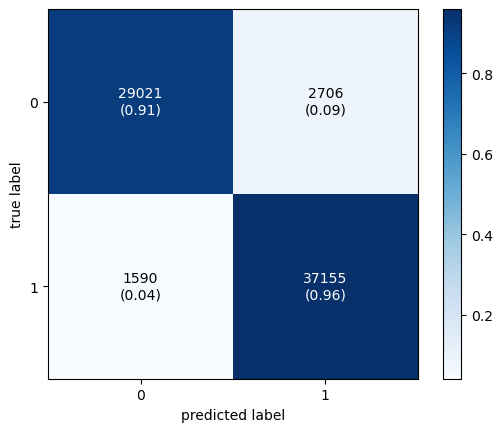

In [45]:
cm1 = confusion_matrix(yre_test,y_pred_test_rf)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Support Vector Machine (SVM)

In [46]:
svm = SVC(C=1.0, kernel='rbf', gamma='scale')
svm.fit(xre_train, yre_train)

SVC()

In [47]:
print(svm.score(xre_train, yre_train))
print(svm.score(xre_test, yre_test))

0.8822917680256884
0.8807185832671132


In [48]:
y_pred_train_svm = svm.predict(xre_train)
acc_train_svm = accuracy_score(yre_train, y_pred_train_svm)

y_pred_test_svm = svm.predict(xre_test)
acc_test_svm = accuracy_score(yre_test, y_pred_test_svm)
print(acc_train_svm)
print(acc_test_svm)

0.8822917680256884
0.8807185832671132


In [49]:
print(classification_report(yre_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     31727
           1       0.86      0.93      0.90     38745

    accuracy                           0.88     70472
   macro avg       0.88      0.88      0.88     70472
weighted avg       0.88      0.88      0.88     70472



In [50]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_svm,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_svm,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_svm,average="micro"))

Precision: 0.881
Recall: 0.881
F-measure: 0.881


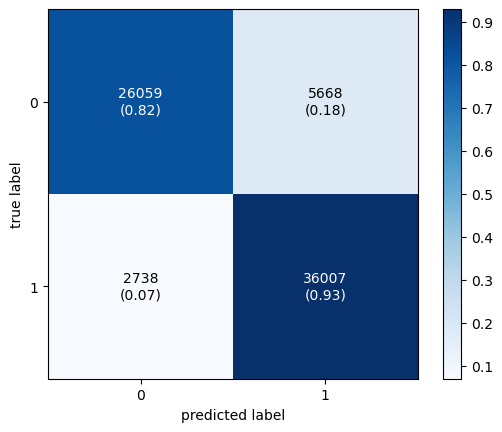

In [51]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(yre_test,y_pred_test_svm)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Extreme Gradient Boosting (XGB)

In [52]:
xgb=XGBClassifier(max_depth=20)
xgb.fit(xre_train,yre_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print(xgb.score(xre_train,yre_train))
print(xgb.score(xre_test,yre_test))

0.999787146054296
0.9682285162901578


In [55]:
y_pred_train_xgb = xgb.predict(xre_train)
acc_train_xgb = accuracy_score(yre_train,y_pred_train_xgb)
y_pred_test_xgb=xgb.predict(xre_test)
acc_test_xgb = accuracy_score(yre_test,y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

0.999787146054296
0.9682285162901578


In [56]:
print(classification_report(yre_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     31727
           1       0.98      0.96      0.97     38745

    accuracy                           0.97     70472
   macro avg       0.97      0.97      0.97     70472
weighted avg       0.97      0.97      0.97     70472



In [57]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_xgb,average="micro"))

Precision: 0.968
Recall: 0.968
F-measure: 0.968


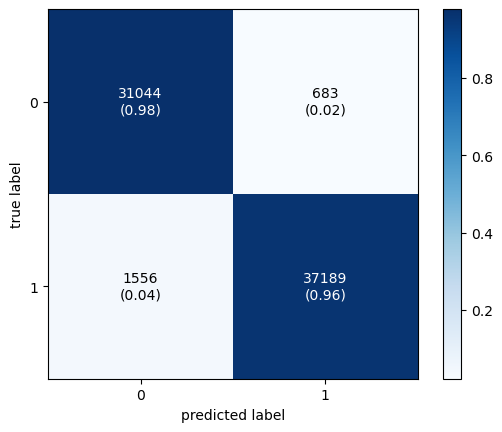

In [58]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(yre_test,y_pred_test_xgb)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()